In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scroutines import powerplots

In [38]:
outdir = "/data/qlyu/v1/results_merfish/plots_230621"
!mkdir -p $outdir

In [15]:
f1 = '/data/qlyu/v1/data/merfish/merfish_06142023/ant/region0/cell_by_gene.csv'
f2 = '/data/qlyu/v1/data/merfish/merfish_06142023/ant/region0/cell_metadata.csv'

df1 = pd.read_csv(f1)
df2 = pd.read_csv(f2)
df1.shape, df2.shape

((339963, 551), (339963, 17))

<Axes: xlabel='volume', ylabel='Count'>

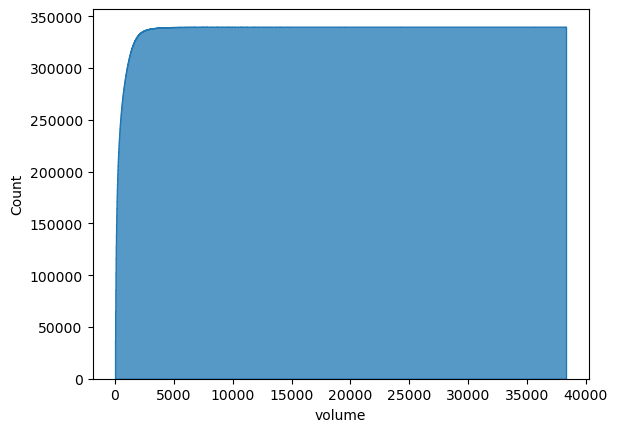

In [19]:
sns.histplot(df2['volume'], cumulative=True, element='step')

In [23]:
df = df2.join(df1)
print(df.shape)
df = df[df['volume'] < 5000] 
print(df.shape)
df

(339963, 568)
(339619, 568)


,EntityID,fov,volume,center_x,center_y,min_x,min_y,max_x,max_y,anisotropy,...,Blank-41,Blank-42,Blank-43,Blank-44,Blank-45,Blank-46,Blank-47,Blank-48,Blank-49,Blank-50
0,2595481500028100001,706,1630.280873,3647.559669,338.427156,3637.226911,319.444311,3657.683610,370.355141,2.773009,...,0,0,0,0,0,0,0,0,0,0
1,2595481500028100003,706,63.702436,3646.036279,391.841719,3642.078426,387.699250,3649.919356,396.257959,1.231231,...,0,0,0,0,0,0,0,0,0,0
2,2595481500028100004,706,19.426091,3642.515217,336.057954,3640.493725,334.024084,3644.591050,338.114803,1.021959,...,0,0,0,0,0,0,0,0,0,0
3,2595481500028100007,706,50.829000,3647.477030,390.622928,3645.029652,387.728915,3649.919356,393.414603,1.505327,...,0,0,0,0,0,0,0,0,0,0
4,2595481500028100008,706,83.201878,3650.998622,321.458358,3646.895982,318.707739,3655.047917,324.183020,1.544156,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339958,2595481504088100024,757,257.810634,4146.634488,10317.035870,4133.073812,10309.026458,4161.362749,10339.303957,1.263381,...,0,0,0,0,0,0,0,0,0,0
339959,2595481504088100026,757,574.727537,4158.320054,10288.110423,4147.982931,10280.390051,4168.800463,10300.282239,1.616396,...,0,0,0,0,0,0,0,0,0,0
339960,2595481504088100029,757,778.513785,4154.120200,10320.628578,4140.959515,10301.870198,4163.311378,10336.900481,2.211156,...,0,0,0,0,0,0,0,0,0,0
339961,2595481504088100032,757,249.138829,4168.836957,10337.154021,4163.963265,10331.174366,4174.734547,10343.301844,1.182711,...,0,0,0,0,0,0,0,0,0,0


In [24]:
np.all(df['cell'] == df['EntityID'])

True

In [59]:
# functions (the teacher wrote for you to use later)
def rot2d(x, y, theta, unit='degree'):
    """ rotate data points defined by `x` and `y` by `theta` degree
    """
    a = np.vstack([x,y]).T
    if unit == 'degree':
        theta = theta*np.pi/180 # convert to radian

    R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    ar = a.dot(R.T)
    return ar[:,0], ar[:,1]

def st_scatter(x, y, gexp=None, vmax_p=98, title='', s=1, cbar_label='', output='', cmap='rocket_r', axis_off=True):
    """customized scatter plot -- yesterday's progress
    """
  
    fig, ax = plt.subplots(figsize=(10,8))
    if gexp is not None:
        vmax = np.percentile(gexp, vmax_p)
        g = ax.scatter(x, y, c=gexp, s=s, edgecolor='none', vmax=vmax, cmap=cmap, rasterized=True)
        fig.colorbar(g, label=cbar_label, shrink=0.3)
    else:
        g = ax.scatter(x, y, s=s, edgecolor='none', cmap=cmap, rasterized=True)
  
    if axis_off:
        ax.axis('off')
    ax.set_title(title)
    ax.set_aspect('equal')
  
    if output:
        powerplots.savefig_autodate(fig, output)
        
    return 

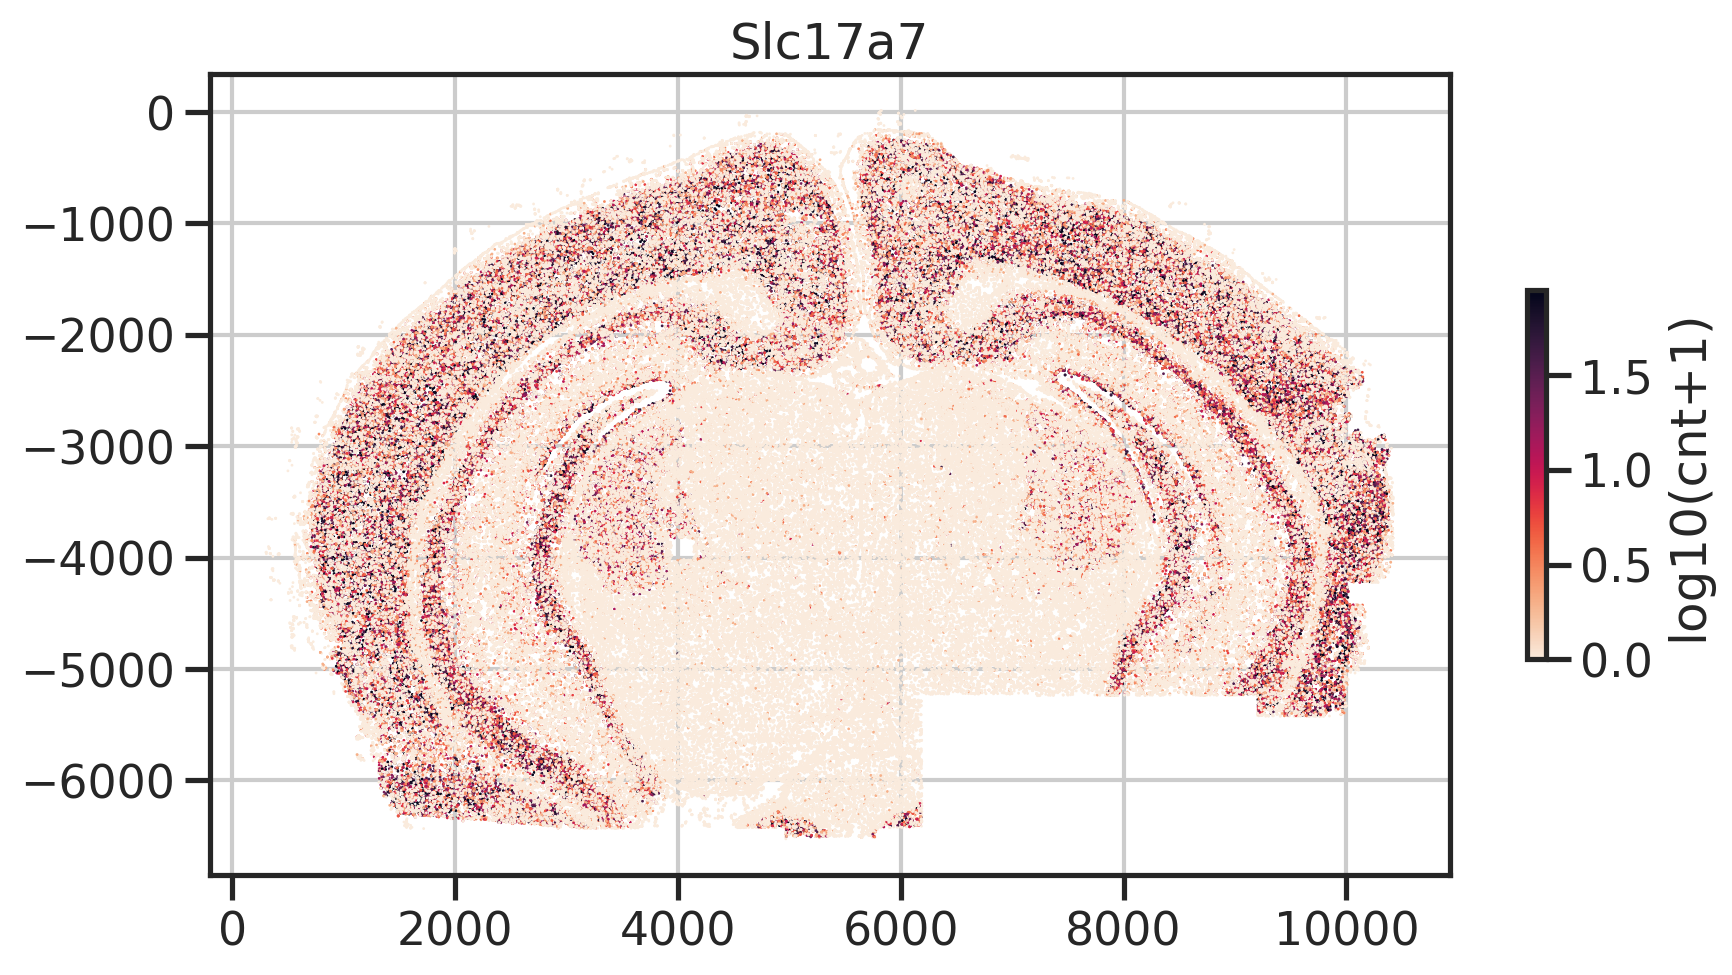

In [60]:
x = df['center_x']
y = df['center_y']
xr, yr = rot2d(x, y, 270)
gn = 'Slc17a7'
g = np.log10(1+df[gn])
st_scatter(xr, yr, gexp=g, title=gn, cbar_label='log10(cnt+1)', axis_off=False)

In [61]:
genes = df1.iloc[:,1:].columns
genes

Index(['Cdh4', 'Pdgfra', 'Kcnn3', 'S100a6', 'Col6a1', 'Slc26a4', 'Ube2c',
       'Ell2', 'Smo', 'Prkd1',
       ...
       'Blank-41', 'Blank-42', 'Blank-43', 'Blank-44', 'Blank-45', 'Blank-46',
       'Blank-47', 'Blank-48', 'Blank-49', 'Blank-50'],
      dtype='object', length=550)

In [62]:
for gn in genes:
    g = np.log10(1+df[gn])
    output = outdir + f'/{gn}.pdf'
    print(output)
    st_scatter(xr, yr, gexp=g, title=gn, cbar_label='log10(cnt+1)', output=output)
    plt.close()
    # break

/data/qlyu/v1/results_merfish/plots_230621/Cdh4.pdf
saved the figure to: /data/qlyu/v1/results_merfish/plots_230621/Cdh4_2023-06-21.pdf
/data/qlyu/v1/results_merfish/plots_230621/Pdgfra.pdf
saved the figure to: /data/qlyu/v1/results_merfish/plots_230621/Pdgfra_2023-06-21.pdf
/data/qlyu/v1/results_merfish/plots_230621/Kcnn3.pdf
saved the figure to: /data/qlyu/v1/results_merfish/plots_230621/Kcnn3_2023-06-21.pdf
/data/qlyu/v1/results_merfish/plots_230621/S100a6.pdf
saved the figure to: /data/qlyu/v1/results_merfish/plots_230621/S100a6_2023-06-21.pdf
/data/qlyu/v1/results_merfish/plots_230621/Col6a1.pdf
saved the figure to: /data/qlyu/v1/results_merfish/plots_230621/Col6a1_2023-06-21.pdf
/data/qlyu/v1/results_merfish/plots_230621/Slc26a4.pdf
saved the figure to: /data/qlyu/v1/results_merfish/plots_230621/Slc26a4_2023-06-21.pdf
/data/qlyu/v1/results_merfish/plots_230621/Ube2c.pdf
saved the figure to: /data/qlyu/v1/results_merfish/plots_230621/Ube2c_2023-06-21.pdf
/data/qlyu/v1/results_merf